<a href="https://colab.research.google.com/github/bilnazir/stockmarketprediction/blob/GRU/fyp_GRU_amzn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas-ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=dc949d7566ae5340d74ea83f6f96a90961e4ffc16f702fb49761ff8ed705ed55
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas-ta


In [2]:
 # Module import
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from scipy.stats import median_abs_deviation
from tensorflow.keras import layers, models, optimizers, losses, callbacks,\
                             regularizers
from tensorflow.keras.optimizers import Nadam, RMSprop
import pandas_ta as ta
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn import linear_model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError

In [3]:
df = yf.download(tickers= ['AMZN'], start='2012-01-01', end= '2022-12-31')

df_3 = df.dropna()
df_3

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,8.794500,8.974000,8.777500,8.951500,8.951500,102216000
2012-01-04,8.960500,9.025000,8.803500,8.875500,8.875500,84104000
2012-01-05,8.797000,8.912500,8.702500,8.880500,8.880500,76182000
2012-01-06,8.903500,9.232500,8.875000,9.130500,9.130500,140168000
2012-01-09,9.138000,9.218500,8.850000,8.928000,8.928000,101138000
...,...,...,...,...,...,...
2022-12-23,83.250000,85.779999,82.930000,85.250000,85.250000,57433700
2022-12-27,84.970001,85.349998,83.000000,83.040001,83.040001,57284000
2022-12-28,82.800003,83.480003,81.690002,81.820000,81.820000,58228600


In [4]:
# Stock indicators for Processing

df_3['RSI']=ta.rsi(df_3.Close, length=15)
df_3['EMAF']=ta.ema(df_3.Close, length=20)
df_3['EMAM']=ta.ema(df_3.Close, length=100)
df_3['EMAS']=ta.ema(df_3.Close, length=150)

df_3['Target'] = df_3['Adj Close']-df_3.Open
df_3['Target'] = df_3['Target'].shift(-1)

df_3['TargetClass'] = [1 if df_3.Target[i]>0 else 0 for i in range(len(df_3))]

df_3['Target Adj Close'] = df_3['Adj Close'].shift(-1)

df_3.dropna(inplace=True)
df_3.reset_index(inplace = True)
df_3.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)
df_3


<ipython-input-4-c6e0b158a695>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_3['TargetClass'] = [1 if df_3.Target[i]>0 else 0 for i in range(len(df_3))]


,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,Target Adj Close
0,11.778000,11.787000,11.690500,11.699500,58.920636,11.385374,10.634717,10.180807,0.121500,1,11.828000
1,11.706500,11.900000,11.662500,11.828000,61.131952,11.427529,10.658346,10.202624,-0.045500,0,11.719000
2,11.764500,11.822500,11.679500,11.719000,58.280677,11.455288,10.679349,10.222708,0.006500,1,11.703000
3,11.696500,11.799500,11.675000,11.703000,57.856280,11.478880,10.699620,10.242315,-0.016500,0,11.637500
4,11.654000,11.742500,11.571500,11.637500,56.065531,11.493986,10.718191,10.260794,0.010500,1,11.622000
...,...,...,...,...,...,...,...,...,...,...,...
2613,85.519997,85.680000,82.250000,83.790001,34.747388,89.858585,106.547624,113.525789,2.000000,1,85.250000
2614,83.250000,85.779999,82.930000,85.250000,38.082516,89.419672,106.125889,113.151275,-1.930000,0,83.040001
2615,84.970001,85.349998,83.000000,83.040001,35.167389,88.812084,105.668743,112.752450,-0.980003,0,81.820000
2616,82.800003,83.480003,81.690002,81.820000,33.644134,88.146172,105.196490,112.342749,1.309998,1,84.180000


In [6]:
df_4 = df_3.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)
df_4.head(10)
df_4

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,Target Adj Close
0,11.778000,11.787000,11.690500,11.699500,58.920636,11.385374,10.634717,10.180807,0.121500,1,11.828000
1,11.706500,11.900000,11.662500,11.828000,61.131952,11.427529,10.658346,10.202624,-0.045500,0,11.719000
2,11.764500,11.822500,11.679500,11.719000,58.280677,11.455288,10.679349,10.222708,0.006500,1,11.703000
3,11.696500,11.799500,11.675000,11.703000,57.856280,11.478880,10.699620,10.242315,-0.016500,0,11.637500
4,11.654000,11.742500,11.571500,11.637500,56.065531,11.493986,10.718191,10.260794,0.010500,1,11.622000
...,...,...,...,...,...,...,...,...,...,...,...
2613,85.519997,85.680000,82.250000,83.790001,34.747388,89.858585,106.547624,113.525789,2.000000,1,85.250000
2614,83.250000,85.779999,82.930000,85.250000,38.082516,89.419672,106.125889,113.151275,-1.930000,0,83.040001
2615,84.970001,85.349998,83.000000,83.040001,35.167389,88.812084,105.668743,112.752450,-0.980003,0,81.820000
2616,82.800003,83.480003,81.690002,81.820000,33.644134,88.146172,105.196490,112.342749,1.309998,1,84.180000


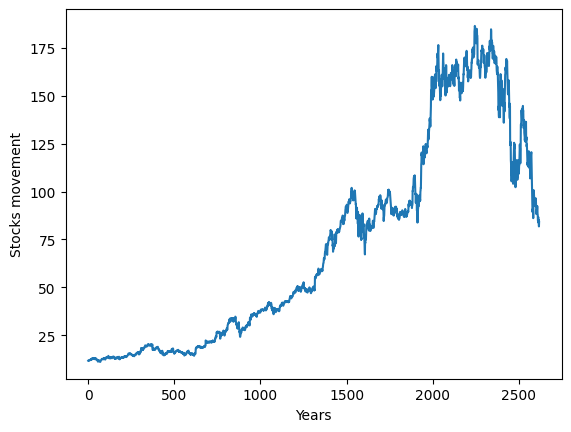

In [7]:
df_4_AC=df_4['Adj Close']
plt.ylabel('Stocks movement')
plt.xlabel('Years')
plt.plot(df_4_AC)

In [8]:

sc = MinMaxScaler(feature_range=(0,1))
df_4_scaled = sc.fit_transform(df_3)
print(df_4_scaled)


[[0.0040452  0.00298203 0.00449317 ... 0.41576511 1.         0.00454596]
 [0.00363926 0.00361902 0.00433219 ... 0.40720585 0.         0.00392502]
 [0.00396855 0.00318215 0.00442993 ... 0.40987101 1.         0.00383388]
 ...
 [0.41959129 0.41766441 0.41448166 ... 0.35930961 0.         0.40326877]
 [0.40727117 0.40712305 0.40694993 ... 0.47667934 1.         0.41671297]
 [0.40766859 0.41315475 0.41189444 ... 0.45464047 1.         0.41568756]]


In [9]:
# Multiple feature for data
X = []

backcandles = 40
print(df_4_scaled.shape[0])
for j in range(8):  # Targeted columns 2
    X.append([])
    for i in range(backcandles, df_4_scaled.shape[0]):#backcandles+2
        X[j].append(df_4_scaled[i-backcandles:i, j])

X=np.moveaxis(X, [0], [2])
X, yi =np.array(X), np.array(df_4_scaled[backcandles:,-1]) #scaling backwards
y=np.reshape(yi,(len(yi),1))
print(X)
print(X.shape)
print(y)
print(y.shape)

2618
[[[4.04520200e-03 2.98202501e-03 4.49317340e-03 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [3.63926321e-03 3.61901746e-03 4.33219026e-03 ... 2.50087336e-04
   1.46973225e-04 1.36717333e-04]
  [3.96855481e-03 3.18214522e-03 4.42992611e-03 ... 4.14770820e-04
   2.77610852e-04 2.62576805e-04]
  ...
  [8.29763729e-03 9.08701127e-03 9.29681509e-03 ... 7.64528150e-03
   5.99181341e-03 5.53571126e-03]
  [9.88733004e-03 8.97427196e-03 1.00672368e-02 ... 7.66897380e-03
   6.12950918e-03 5.67281203e-03]
  [9.67726499e-03 8.73750919e-03 9.28819021e-03 ... 7.62515153e-03
   6.25025257e-03 5.79851041e-03]]

 [[3.63926321e-03 3.61901746e-03 4.33219026e-03 ... 2.50087336e-04
   1.46973225e-04 1.36717333e-04]
  [3.96855481e-03 3.18214522e-03 4.42992611e-03 ... 4.14770820e-04
   2.77610852e-04 2.62576805e-04]
  [3.58248712e-03 3.05249313e-03 4.40405695e-03 ... 5.54730148e-04
   4.03690947e-04 3.85441278e-04]
  ...
  [9.88733004e-03 8.97427196e-03 1.00672368e-02 ... 7.66897380e-03
   6.

In [10]:
# split data into training and testing
train_test_split = int(len(X)*0.7)
print(train_test_split)
X_train, X_test = X[:train_test_split], X[train_test_split:]
y_train, y_test = y[:train_test_split], y[train_test_split:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

1804
(1804, 40, 8)
(774, 40, 8)
(1804, 1)
(774, 1)
[[0.01006036]
 [0.01135636]
 [0.01079808]
 ...
 [0.44462676]
 [0.44131128]
 [0.43867086]]


In [11]:
# Define the input shape
input_shape = (backcandles, 8)
input_layer = layers.Input(shape=input_shape, name='Input')

# GRU Layer 1
gru_1 = layers.GRU(units=50, return_sequences=True, activation='tanh', kernel_regularizer=l2(0.01), dropout=0.2, recurrent_dropout=0.1)(input_layer)

# LSTM Layer
lstm_input = layers.Reshape((1, -1))(gru_1)
lstm_1 = layers.LSTM(units= 50, activation='tanh')(lstm_input)

# Output Layer
output_layer = layers.Dense(1, activation='linear')(lstm_1)

# Create the model
gru_model = models.Model(inputs=input_layer, outputs=output_layer, name='GRU_Model')
gru_model.summary()


Model: "GRU_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input (InputLayer)                   │ (None, 40, 8)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 40, 50)              │           9,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 1, 2000)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 50)                  │         410,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 419,251 (1.60 MB)

 Trainable params: 419,251 (1.60 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Compile the model
gru_model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])


In [18]:
# Train the model
history = gru_model.fit( X_train,
    y_train,
    batch_size=64,
    epochs=60,
    validation_data=(X_test, y_test),
    verbose=1,)

print(history.history.keys)

Epoch 1/60
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 6.5888e-04 - mean_absolute_error: 0.0122 - val_loss: 0.0500 - val_mean_absolute_error: 0.2096
Epoch 2/60
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 8.6975e-04 - mean_absolute_error: 0.0181 - val_loss: 0.0370 - val_mean_absolute_error: 0.1783
Epoch 3/60
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 6.4873e-04 - mean_absolute_error: 0.0136 - val_loss: 0.0314 - val_mean_absolute_error: 0.1639
Epoch 4/60
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 7.7249e-04 - mean_absolute_error: 0.0137 - val_loss: 0.0668 - val_mean_absolute_error: 0.2433
Epoch 5/60
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 8.7427e-04 - mean_absolute_error: 0.0182 - val_loss: 0.0352 - val_mean_absolute_error: 0.1736
Epoch 6/60
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 7.7554e-04 - mean_absolute_error: 0.0148 - val_loss: 0.0295 - val_mean_absolute_error: 0.1591
Epoch 7/60
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 8.1272e-04 - mean_absol

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
[0.36103982] [0.43291437]
[0.35835028] [0.43608172]
[0.355499] [0.43548642]
[0.35375324] [0.43255263]
[0.352987] [0.43526137]
[0.35245386] [0.43856833]
[0.35274425] [0.43874205]
[0.35395706] [0.44109767]
[0.35542324] [0.44720734]
[0.35708275] [0.4453189]


<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

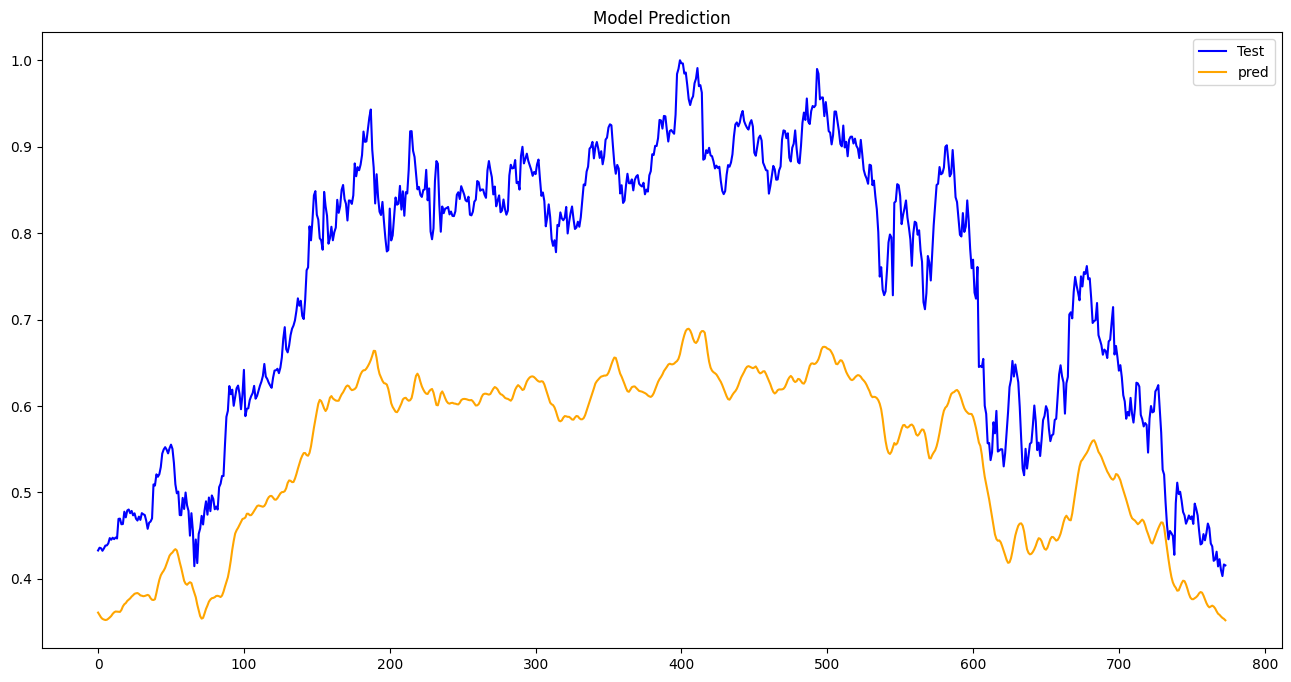

In [19]:
# Make predictions on test data

# Model prediction
y_pred = gru_model.predict(X_test)
for i in range(10):
    print(y_pred[i], y_test[i])

    plt.figure(figsize=(16,8))


plt.plot(y_test, color = 'blue', label = 'Test')
plt.plot(y_pred, color = 'orange', label = 'pred')
plt.legend(loc=0)
plt.title('Model Prediction')
plt.show()

In [20]:
# Convert training history to datafram for viewing and graphing.
hist = pd.DataFrame(history.history)
hist.head()

,loss,mean_absolute_error,val_loss,val_mean_absolute_error
0,0.000716,0.013129,0.049959,0.209571
1,0.000924,0.018081,0.036962,0.178314
2,0.000641,0.013651,0.031384,0.163908
3,0.000700,0.013690,0.066792,0.243344
4,0.000840,0.016936,0.035242,0.173612


In [21]:
# Evaluate the model
loss = gru_model.evaluate(X_test, y_test, verbose=0)[0]  # Extract the loss value from the list
y_pred = gru_model.predict(X_test)
mae = np.mean(np.abs(y_pred - y_test))  # Calculate MAE manually

print(f"Test loss: {loss:.4f}, Test MAE: {mae:.4f}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Test loss: 0.0437, Test MAE: 0.1960


In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2) score: {r2:.4f}")

Mean Absolute Error (MAE): 0.1960
Mean Squared Error (MSE): 0.0436
Root Mean Squared Error (RMSE): 0.2087
R-squared (R2) score: -0.6351
